In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [154]:
city_data = pd.read_csv('/Users/krishna/Documents/School/GeorgiaTech/HW/HW5/Pyber/data/city_data.csv')
ride_data = pd.read_csv('/Users/krishna/Documents/School/GeorgiaTech/HW/HW5/Pyber/data/ride_data.csv')

In [155]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [156]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [157]:
city_data.shape

(120, 3)

In [158]:
ride_data.shape

(2375, 4)

# DataFrame Construction

In [159]:
data = city_data.merge(ride_data, 'left', on = 'city')

In [160]:
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


### Data Set

In [161]:
full_data = data.groupby('city').aggregate({'fare' : 'mean', 'ride_id': 'count'})

In [162]:
full_data = full_data.rename(columns = {'ride_id': 'rides'})

In [163]:
full_data.head()

,fare,rides
city,,
Amandaburgh,24.641667,18
Barajasview,25.332273,22
Barronchester,36.422500,16
Bethanyland,32.956111,18
Bradshawfurt,40.064000,10


In [164]:
stuff = data.drop_duplicates('city')[['city', 'type', 'driver_count']]

In [165]:
full_data = full_data.merge(stuff, 'left', on = 'city')

# Final Data Set

In [166]:
full_data = full_data.set_index('city')

In [167]:
full_data.head()

,fare,rides,type,driver_count
city,,,,
Amandaburgh,24.641667,18,Urban,12
Barajasview,25.332273,22,Urban,26
Barronchester,36.422500,16,Suburban,11
Bethanyland,32.956111,18,Suburban,22
Bradshawfurt,40.064000,10,Rural,7


In [168]:
test = []

In [169]:
for stuff in full_data['type']:
    if stuff == 'Urban':
        test.append(1)
    elif stuff == 'Suburban':
        test.append(2)
    elif stuff == 'Rural':
        test.append(3)

In [170]:
full_data['type_numeric'] = test

In [171]:
full_data.head()

,fare,rides,type,driver_count,type_numeric
city,,,,,
Amandaburgh,24.641667,18,Urban,12,1
Barajasview,25.332273,22,Urban,26,1
Barronchester,36.422500,16,Suburban,11,2
Bethanyland,32.956111,18,Suburban,22,2
Bradshawfurt,40.064000,10,Rural,7,3


In [172]:
x_urban = full_data[full_data['type'] == 'Urban']['rides']
y_urban = full_data[full_data['type'] == 'Urban']['fare']
z_urban = full_data[full_data['type'] == 'Urban']['driver_count']
color_urban = 'Coral'
group_urban = 'Urban'

In [173]:
x_suburban  = full_data[full_data['type'] == 'Suburban']['rides']
y_suburban = full_data[full_data['type'] == 'Suburban']['fare']
z_suburban = full_data[full_data['type'] == 'Suburban']['driver_count']
color_suburban = 'SkyBlue'
group_suburban = 'Suburban'

In [174]:
x_rural = full_data[full_data['type'] == 'Rural']['rides']
y_rural = full_data[full_data['type'] == 'Rural']['fare']
z_rural = full_data[full_data['type'] == 'Rural']['driver_count']
color_rural = 'Gold'
group_rural = 'Rural'

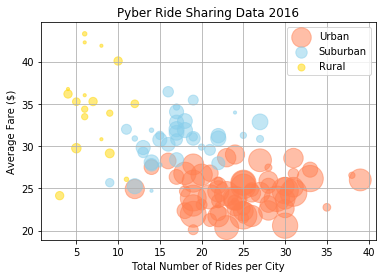

In [177]:
fig, ax = plt.subplots()
ax.scatter(x_urban,  y_urban, s = z_urban * 10 ,  c = color_urban, label = group_urban, alpha = .5)
ax.scatter(x_suburban,  y_suburban, s = z_suburban * 10 ,  c = color_suburban, label = group_suburban, alpha = .5)
ax.scatter(x_rural,  y_rural, s = z_rural * 10,  c = color_rural, label = group_rural, alpha = .5)
ax.legend()
ax.grid(True)
plt.title('Pyber Ride Sharing Data 2016')
plt.xlabel('Total Number of Rides per City')
plt.ylabel('Average Fare ($)')
plt.show()

Cicle size correlates to driver count per city

# Pie Charts

In [267]:
full_data.groupby('type').sum()

,fare,rides,driver_count,type_numeric
type,,,,
Rural,623.479771,125,78,54
Suburban,1106.542729,625,490,72
Urban,1616.942033,1625,2405,66


In [233]:
total_fares = full_data.groupby('type').sum()['fare']

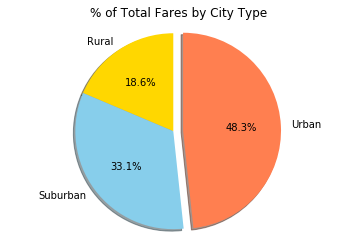

In [272]:
labels = ['Rural', 'Suburban', 'Urban' ]
color = ['Gold', 'Skyblue', 'Coral']
explode = ( 0, 0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(total_fares, shadow=True,labels=labels, startangle=90, autopct='%1.1f%%', explode = explode, colors = color)
ax1.axis('equal')
plt.title('% of Total Fares by City Type')
plt.show()

In [273]:
total_rides = full_data.groupby('type').sum()['rides']

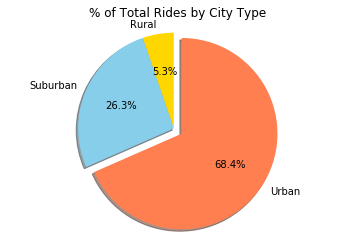

In [274]:
labels = ['Rural', 'Suburban', 'Urban' ]
explode = ( 0, 0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(total_rides, shadow=True,labels=labels, startangle=90, autopct='%1.1f%%', explode = explode, colors = color)
ax1.axis('equal')
plt.title('% of Total Rides by City Type')
plt.show()

In [275]:
driver_count_citytype = full_data.groupby('type').sum()['driver_count']

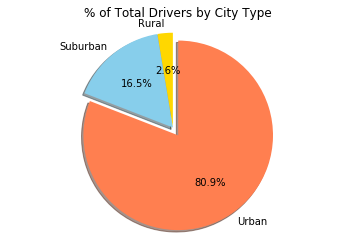

In [276]:
labels = ['Rural', 'Suburban', 'Urban' ]
explode = ( 0, 0,0.1)

fig1, ax1 = plt.subplots()
ax1.pie(driver_count_citytype, shadow=True,labels=labels, startangle=90, autopct='%1.1f%%', explode = explode, colors = color)
ax1.axis('equal')
plt.title( '% of Total Drivers by City Type')
plt.show()

Observations:
1. It makes sense that the most of the rides were in the city as more people in the city don't have cars comparetivly to rural ares
2. It is intresting to notice that the number of total ruarl rides is only 5.3%, however fare of rural make 18.3%.
3. The average fare is far higher on rural compared to urban which could account the fact that urban has more rides comparitvly. 